In [13]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
path = './dados/dados_airbnb'
all_files = glob.glob(path + "/*.csv")
datasets = []
for filename in all_files:
    df = pd.read_csv(filename)
    df['is_weekend'] = ['weekends' in filename] * len(df)
    df['city'] = filename.split('/')[-1].split('\\')[-1].split('_')[0].upper()
    datasets.append(df)

Text(0.5, 1.0, 'ROME False')

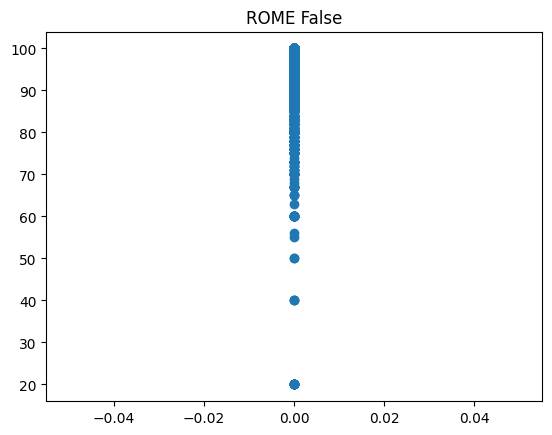

In [54]:
# explorando os dados verificamos que existe uma corelação entre a limpeza do local e se o host é super host. quanto mais limpo, maior a nota, superhost (grande parte das vezes) significa uma média maior de nota
index = 16
plt.scatter(datasets[index]['realSum'], datasets[index]['guest_satisfaction_overall'])
plt.title(datasets[index]['city'][0] + ' ' + str(datasets[4]['is_weekend'][0]))

In [62]:
todos = pd.concat(datasets, ignore_index=True)

In [72]:
todos['room_type'] = [1 if i == 'Private room' else 0.5 if i == 'Entire home/apt' else 0 for i in todos['room_type']]

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,is_weekend,city
0,0,194.033698,1.0,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,False,AMSTERDAM
1,1,344.245776,1.0,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,False,AMSTERDAM
2,2,264.101422,1.0,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,False,AMSTERDAM
3,3,433.529398,1.0,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,False,AMSTERDAM
4,4,485.552926,1.0,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,False,AMSTERDAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,1794,715.938574,0.5,False,False,6.0,False,0,1,10.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,True,VIENNA
51703,1795,304.793960,0.5,False,False,2.0,False,0,0,8.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,True,VIENNA
51704,1796,637.168969,0.5,False,False,2.0,False,0,0,10.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,True,VIENNA
51705,1797,301.054157,1.0,False,True,2.0,False,0,0,10.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,True,VIENNA
